In [52]:
!pip install lightgbm

In [53]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from contextlib import contextmanager
from time import time
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
''' reading dataset '''
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
''' displaying first 5 rows '''
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
''' shape of data '''
df.shape

(215, 15)

In [6]:
''' checking null values '''
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
''' checking info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


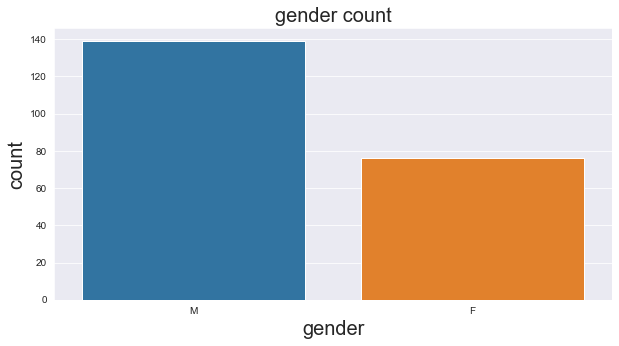

In [12]:
''' count of gender '''
gender_label = df.gender.value_counts()

''' plotting count '''
plt.figure(figsize=(10, 5))
sns.barplot(gender_label.index, gender_label);
plt.xlabel('gender', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('gender count', fontsize=20);

In [14]:
''' count of degrees '''
df.degree_t.value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [17]:
''' count of specialiation '''
df.specialisation.value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [18]:
''' count of status '''
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

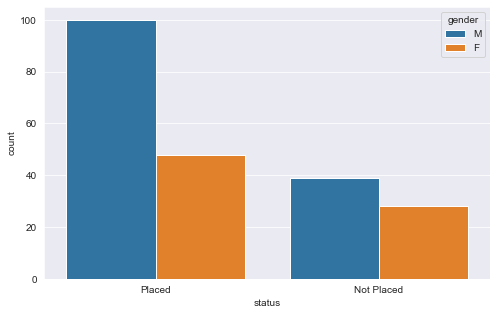

In [22]:
''' chekcing status '''
plt.figure(figsize=(8,5))
sns.countplot(x='status', hue='gender', data=df);

In [23]:
df_ = df

for column in df_.columns:
    if df_[column].dtype != 'object': 
        ''' filling null values with 0 '''
        df_[column] = df_[column].fillna(0)
        
''' transpose df_ '''
df_[0:2].T

,0,1
sl_no,1,2
gender,M,M
ssc_p,67.0,79.33
ssc_b,Others,Central
hsc_p,91.0,78.33
hsc_b,Others,Others
hsc_s,Commerce,Science
degree_p,58.0,77.48
degree_t,Sci&Tech,Sci&Tech
workex,No,Yes


In [25]:
for column in df_.columns:
    if df_[column].dtype=='object': 
        ''' filling null values in N '''
        df_[column] = df_[column].fillna('N')
        ''' label encoder '''
        lbl_enc = LabelEncoder()
        lbl_enc.fit(list(df_[column].values))
        df_[column] = lbl_enc.transform(df_[column].values)

In [26]:
df1 = df_
''' transpose df1 '''
df1[0:2].T

,0,1
sl_no,1.0,2.00
gender,1.0,1.00
ssc_p,67.0,79.33
ssc_b,1.0,0.00
hsc_p,91.0,78.33
hsc_b,1.0,1.00
hsc_s,1.0,2.00
degree_p,58.0,77.48
degree_t,2.0,2.00
workex,0.0,1.00


In [28]:
''' dependent variable and independent variables '''
y_df1 = df1[['status', 'salary']]

''' dropping status and salary from df1 '''
X_df1 = df1.drop(['status', 'salary'], axis=1)

In [30]:
''' transpose y_df1 and X_df1 '''
print(y_df1[0:2].T)
print("-" * 100)
print(X_df1[0:2].T)

               0         1
status       1.0       1.0
salary  270000.0  200000.0
----------------------------------------------------------------------------------------------------
                   0      1
sl_no            1.0   2.00
gender           1.0   1.00
ssc_p           67.0  79.33
ssc_b            1.0   0.00
hsc_p           91.0  78.33
hsc_b            1.0   1.00
hsc_s            1.0   2.00
degree_p        58.0  77.48
degree_t         2.0   2.00
workex           0.0   1.00
etest_p         55.0  86.50
specialisation   1.0   0.00
mba_p           58.8  66.28


In [31]:
''' converting it into numpy array '''
X_train = np.array(X_df1)
y_train = np.array(y_df1)

''' shape of X_train and y_train'''
print(X_train.shape)
print(y_train.shape)

(215, 13)
(215, 2)


In [33]:
columns = list(X_df1.columns)
columns

['sl_no',
 'gender',
 'ssc_p',
 'ssc_b',
 'hsc_p',
 'hsc_b',
 'hsc_s',
 'degree_p',
 'degree_t',
 'workex',
 'etest_p',
 'specialisation',
 'mba_p']

In [34]:
''' converting X_train into DataFrame '''
X_train = pd.DataFrame(X_train, columns=columns)

In [35]:
''' displaying X_train data '''
X_train.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1.0,1.0,67.00,1.0,91.00,1.0,1.0,58.00,2.0,0.0,55.0,1.0,58.80
1,2.0,1.0,79.33,0.0,78.33,1.0,2.0,77.48,2.0,1.0,86.5,0.0,66.28
2,3.0,1.0,65.00,0.0,68.00,0.0,0.0,64.00,0.0,0.0,75.0,0.0,57.80
3,4.0,1.0,56.00,0.0,52.00,0.0,2.0,52.00,2.0,0.0,66.0,1.0,59.43
4,5.0,1.0,85.80,0.0,73.60,0.0,1.0,73.30,0.0,0.0,96.8,0.0,55.50


In [47]:
''' creating a function create_nf '''
def create_nf(inp_df):
    use_cols = columns 
    return inp_df[use_cols].copy()

In [48]:
''' creating class Timer '''
class Timer:
    ''' constructor '''
    def __init__(self, logger=None, frmt_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: frmt_str = str(prefix) + sep + frmt_str
        if suffix: frmt_str = frmt_str + sep + str(suffix)
        ''' instance variables '''
        self.frmt_str = frmt_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.frmt_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [49]:
def to_feature(inp_df):
    p = [create_nf,]
    '''creating dataframe'''
    df = pd.DataFrame()
    
    for func in tqdm(p, total=len(p)):
        with Timer(prefix='create' + func.__name__ + ' '):
            df1 = func(inp_df)

        assert len(df1) == len(inp_df), func.__name__
        output_df = pd.concat([df, df1], axis=1)
        
    return output_df

In [50]:
X_train_result = to_feature(X_train)

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 166.65it/s]

createcreate_nf  0.002[s]


In [83]:
''' creating fit function '''
def fit(X, y, cv, params: dict=None,  verbose: int=50):

    if params is None:
        params = {}

    m = []
    ypred = np.zeros_like(y, dtype=np.float)

    for i, (t_idx, v_idx) in enumerate(cv): 
        X_train, y_train = X[t_idx], y[t_idx]
        X_test, y_test = X[v_idx], y[v_idx]

        ''' model '''
        lg = lgbm.LGBMRegressor(**params)
        
        with Timer(prefix='fit fold={} '.format(i)):
            ''' training '''
            lg.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=verbose)
        
        ''' prediction '''
        pred = lg.predict(X_test)
        ypred[v_idx] = pred
        m.append(lg)
        print(f'Fold {i} RMSLE: {mean_squared_error(y_test, pred) ** .5:.4f}')
        print()

    result_score = mean_squared_error(y, ypred) ** .5
    print('-' * 50)
    print('RMSE: {:.4f}'.format(result_score))
    return ypred, m

In [84]:
p = {
    'objective': 'rmse', 
    'learning_rate': .1,
    'reg_lambda': 1.,
    'reg_alpha': .1,
    'max_depth': 5, 
    'n_estimators': 10000, 
    'colsample_bytree': .5, 
    'min_child_samples': 10,
    'subsample_freq': 3,
    'subsample': .9,
    'importance_type': 'gain', 
    'random_state': 71,
    'num_leaves': 62
}

In [85]:
''' creating dataframe of y_train '''
y_train = pd.DataFrame(y_train)

In [86]:
y_train.head()

,0,1
0,1.0,270000.0
1,1.0,200000.0
2,1.0,250000.0
3,0.0,0.0
4,1.0,425000.0


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[27]	valid_0's rmse: 0.328506
fit fold=0  0.130[s]
Fold 0 RMSLE: 0.3285

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[225]	valid_0's rmse: 0.30133
fit fold=1  0.284[s]
Fold 1 RMSLE: 0.3013

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[41]	valid_0's rmse: 0.28941
fit fold=2  0.148[s]
Fold 2 RMSLE: 0.2894

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[24]	valid_0's rmse: 0.357566
fit fold=3  0.101[s]
Fold 3 RMSLE: 0.3576

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[57]	valid_0's rmse: 0.301637
fit fold=4  0.131[s]
Fold 4 RMSLE: 0.3016

--------------------------------------------------
RMSE: 0.3166
Training until validation scores don't improve for 100 rounds
Early stopping, best iter

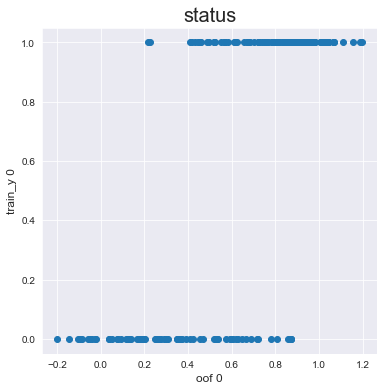

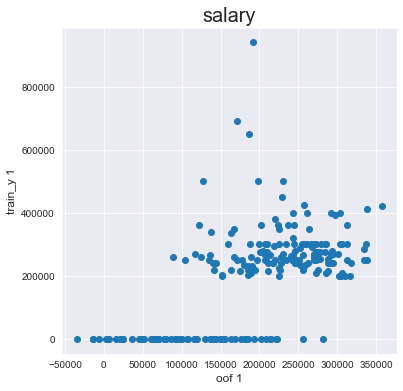

In [88]:
target = ['status', 'salary']
for i in range(2):
    ''' cross-validation '''
    fold = KFold(n_splits=5, shuffle=True, random_state=71)
    y_train_i = y_train.iloc[:,i]
    ''' converting into numpy array '''
    y = np.array(y_train_i)
    cv = list(fold.split(X_train_result, y))
    ypred, models = fit(X_train_result.values, y, cv, params=p, verbose=500)
    
    fig,ax = plt.subplots(figsize=(6,6))
    ax.set_title(target[i],fontsize=20)
    ax.set_xlabel('oof '+str(i),fontsize=12)
    ax.set_ylabel('train_y '+str(i),fontsize=12)
    ax.scatter(ypred,y)